<a href="https://colab.research.google.com/github/SanjeevLakhwani/Group-3-assignment-4/blob/master/Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data
- you would be required to upload your kaggle.json file, either you can upload it or use a differnt way such us importing the data from your computer or your drive.

_To download your kaggle.json, go to the 'Account' tab of your user profile (https://<span></span>www.<span></span>kaggle<span></span>.com/\<username>/account) and select `'Create API Token'`. This will trigger the download of kaggle.json_

- Run all the cells below and move to the next section.

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c mais-202-winter-2021-kaggle-comp
! unzip train_x.npy.zip -d train
! unzip test_x.npy.zip -d test
!mv train/train_x.npy train_x.npy
!mv test/test_x.npy test_x.npy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_data = np.genfromtxt('train_y.csv', delimiter=',')[1:]
train_images = np.load("train_x.npy")
test_images = np.load("test_x.npy")

In [4]:
train_y = my_data[:,[1]]

#Vizzualizzzing📊
- Run these cells to define show_image function and get an idea of how the images look

In [5]:
def show_image(arr):
    two_d = (np.reshape(arr,  arr.shape)* 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

0


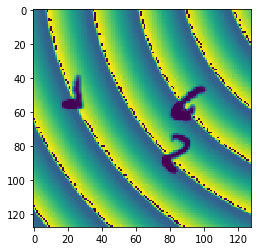

1


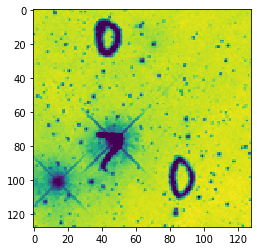

2


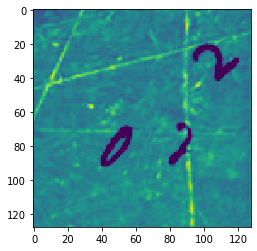

In [6]:
for i in range(3):
  print(i)
  show_image(train_images[i]) # 0 is the index of the training image you want to display

#Pre-processing an image
- This is our floodfill function that is used as pre-processing for our dataset and algorithmically tries to return just the digits from the image.
- You do not need to run everythin just import non_padded.npy file for it

In [7]:
!wget -O non_padded.npy https://www.dropbox.com/s/tqocfl306ce4gdd/non_padded_train_digits%20%20new.npy?dl=1

--2021-04-06 05:29:40--  https://www.dropbox.com/s/tqocfl306ce4gdd/non_padded_train_digits%20%20new.npy?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/tqocfl306ce4gdd/non_padded_train_digits%20%20new.npy [following]
--2021-04-06 05:29:40--  https://www.dropbox.com/s/dl/tqocfl306ce4gdd/non_padded_train_digits%20%20new.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce55bc83757f08ee33608bec9ef.dl.dropboxusercontent.com/cd/0/get/BMHR_vsUuojzpiK6Vk7Ip2GBpIdcjmlyAhTrzBsoQVlBpCgr9YYlRsfCREhKgDTn0cFFKsgTTW1FH1NEIXxFQKFBvcC5JJQNJo1DG_n20ooF8Aw_PD914I_GzdQnnwCyQzG6OMeH9Wkessq3bK-zzszj/file?dl=1# [following]
--2021-04-06 05:29:41--  https://uce55bc83757f08ee33608bec9ef.dl.dropboxusercontent.com/cd/0/get/BMHR_vsUuojzpiK6

In [8]:
import sys
sys.setrecursionlimit(10**6)

def getDigits(image):
  image = np.copy(image)
  digits = []
  d_imgs = []
  while np.amax(image)==255:
    filled_cells = []
    ffc = first_filled_cell(image)
    help_ff(image, filled_cells, ffc)

    if(len(filled_cells)>30):
      
      digits.append(filled_cells)

  d_imgs = []
  for d in digits:
    im = generate_to_img(d)
    if(im.shape[0]*im.shape[1]>10):
      d_imgs.append(im)
  return remove_blob(d_imgs) 
  
def help_ff(img, fc, ffc):
  r,c=ffc
  if (img[r, c] < 205):
    return
  img[r,c]=0
  fc.append(ffc)
  if r-1>=0:
    help_ff(img, fc, [r-1, c])
  if r+1<128:
    help_ff(img, fc, [r+1, c])
  if c-1>=0:
    help_ff(img, fc, [r, c-1])
  if c+1<128:
    help_ff(img, fc, [r, c+1])
  if r-2>=0:
    help_ff(img, fc, [r-2, c])
  if r+2<128:
    help_ff(img, fc, [r+2, c])
  if c-2>=0:
    help_ff(img, fc, [r, c-2])
  if c+2<128:
    help_ff(img, fc, [r, c+2])
  if r-3>=0:
    help_ff(img, fc, [r-3, c])
  if r+3<128:
    help_ff(img, fc, [r+3, c])
  if c-3>=0:
    help_ff(img, fc, [r, c-3])
  if c+3<128:
    help_ff(img, fc, [r, c+3])

  
def first_filled_cell(img):
  for r in range(128):
    for c in range(128):
      if img[r,c]==255:
        return [r,c]

def generate_to_img(d):
  hr = -1
  hc = -1
  lr = 129
  lc = 129
  for cell in d:
    r,c = cell
    if r < lr:
      lr = r
    if r > hr:
      hr = r
    if c < lc :
      lc = c
    if c > hc:
      hc = c
  if (hr-lr+1<=7 and hc-lc+1<=7):
    return np.array([[1,1],[1,1]])
  img = np.zeros((hr-lr+1,hc-lc+1))
  for p in d:
    r, c = p
    img[r-lr][c-lc] = 1
  return img

def remove_blob(d_imgs):
  if (len(d_imgs)<=3):
    return d_imgs
  best_three = []
  maximum_list = []
  if len(d_imgs) > 3:
    for img in d_imgs:
      h = img.shape[0]
      w = img.shape[1]
      if h>w:
        current_maximum = h
      else:
        current_maximum = w
      maximum_list.append(current_maximum)
      
    best_three_indices = sorted(range(len(maximum_list)), key=lambda k: maximum_list[k])[:3]
    
    for indices in best_three_indices:
      best_three.append(d_imgs[indices])

  return best_three

In [ ]:
non_padded_train_digits=[]
for image in train_images:
  non_padded_train_digits.append(getDigits(image))

non_padded_train_digits=np.array(non_padded_train_digits)
np.save("non_padded_train_digits.npy", non_padded_train_digits)

##testin ✅

0


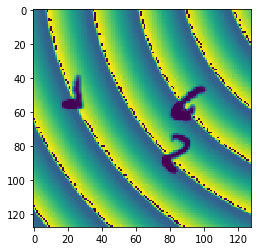

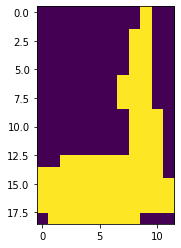

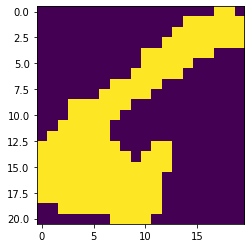

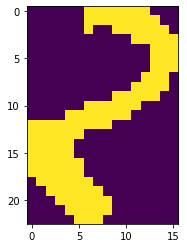

1


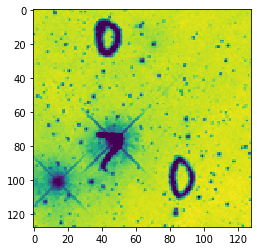

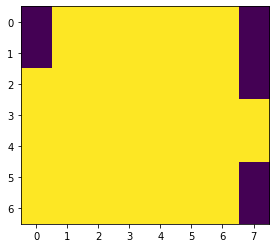

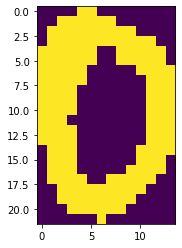

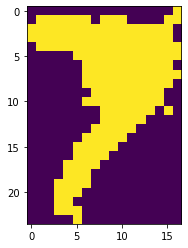

2


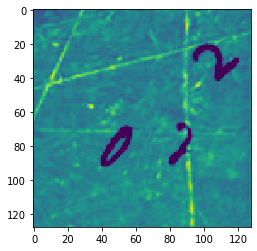

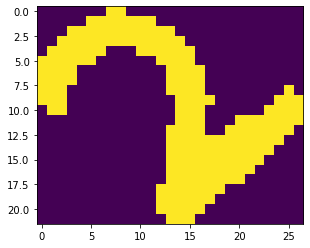

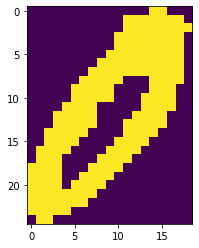

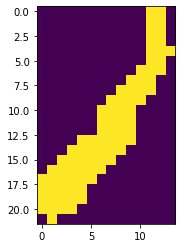

3


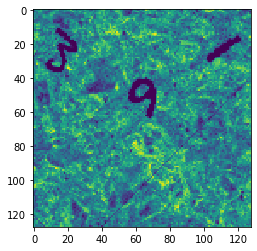

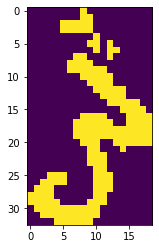

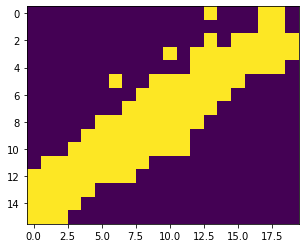

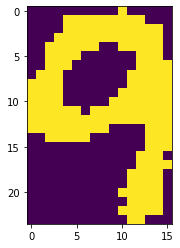

4


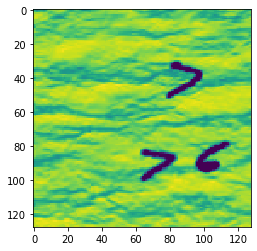

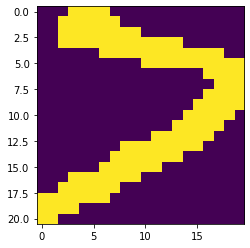

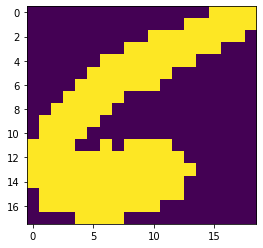

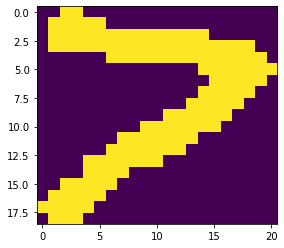

5


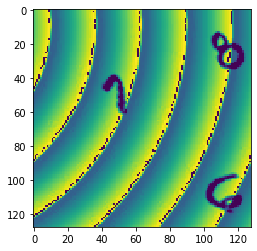

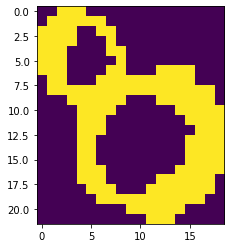

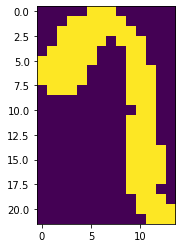

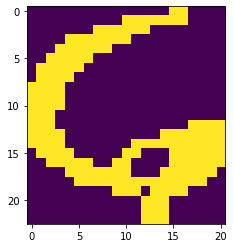

6


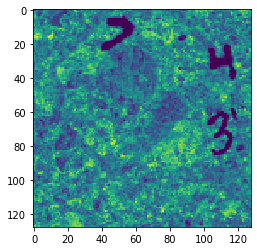

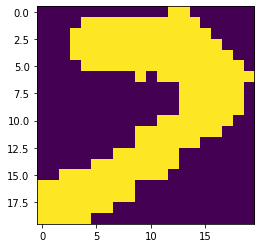

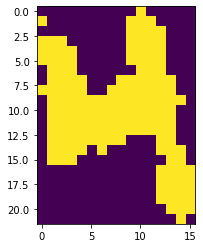

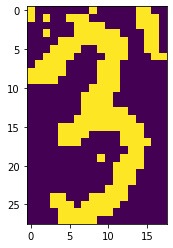

7


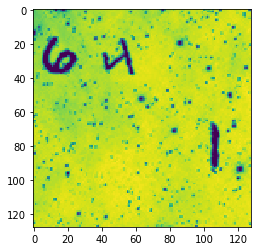

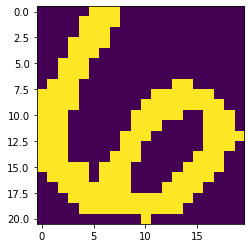

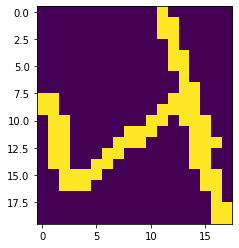

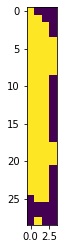

8


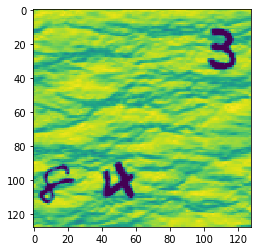

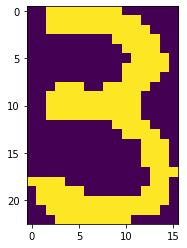

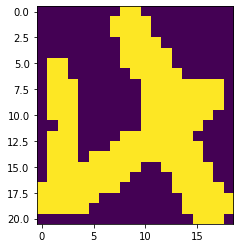

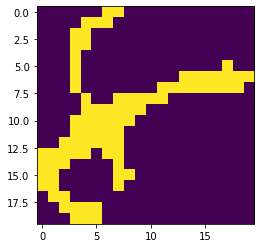

9


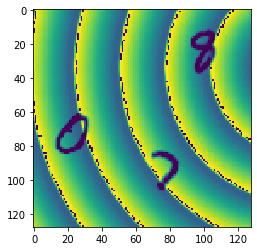

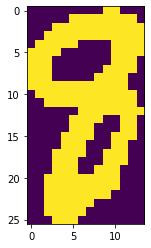

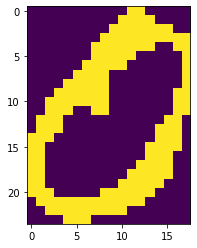

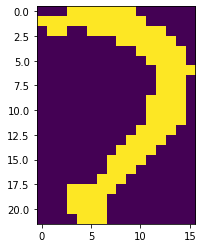

In [10]:
for i in range(10):
  img = train_images[i]
  print(i)
  show_image(img)
  digits = getDigits(img)
  for d in digits:
    show_image(d)

# Padding
- this is to make every digit size same
- You need to run every cell in this block

In [11]:
def padding(array, xx, yy):

    if array.shape[0]>32:
      array = array[:32] 
    if array.shape[1]>32:
      array = array[:,:32]

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

In [12]:
non_padded_train_digits = np.load("non_padded.npy", allow_pickle = True)

padded_train_digits=[]

for digits in non_padded_train_digits:
  temp = []
  for d in digits:
    temp.append(padding(d, 32, 32))
  padded_train_digits.append(temp)

padded_train_digits=np.array(padded_train_digits)
np.save("padded_train_digits.npy", padded_train_digits)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


#PCA with KNN

##preprocess the training set 

Importing the padded training dataset

In [13]:
padded_train_digits = np.load("padded_train_digits.npy", allow_pickle = True)

Linearizing the padded training dataset


In [14]:
linearized_data = []
for digs in padded_train_digits:
  for d in digs:
    linearized_data.append(d.flatten())
linearized_data = np.array(linearized_data)
np.save("linearized_data.npy", linearized_data)

In [15]:
print(linearized_data.shape)

(119448, 1024)


Importing the labelled training dataset

In [ ]:
!wget -O train_X_700.npy = https://www.dropbox.com/s/ym0pxxin65p6ppj/first_700_padded_images.npy?dl=1
!wget -O train_y_700.npy = https://www.dropbox.com/s/c5z0an79n1lcww7/train_y_700.npy?dl=1
train_X = np.load("train_X_700.npy",allow_pickle=True)
train_y = np.load("train_y_700.npy",allow_pickle=True)


Removing the images with label "-1" (illegible)

In [17]:
labelled_imgs_x = []
labelled_imgs_y = []
labelled_imgs_x = []
for i in range(train_y.shape[0]):
  if train_y[i] != -1:
    labelled_imgs_x.append(train_X[i].flatten())
    labelled_imgs_y.append(train_y[i])
labelled_imgs_x = np.array(labelled_imgs_x)
labelled_imgs_y = np.array(labelled_imgs_y)

In [ ]:
print(labelled_imgs_x.shape)
print(labelled_imgs_y.shape)

##training PCA

training pca

* fit it on `linearized_data`

* transform and save `linearized_data`

* transform and save `labelled_imgs_x`

* also make a function `predict_label(image)` that predicts the label by flattening the image first and then transforming it with pca and then projection onto saved transformed labelled_imgs_x and getting returning the label from labelled_imgs_y by the corresponding highest value of projection


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
expanded_data=[]
for digits in padded_train_digits:
  for d in digits:
    expanded_data.append(d)

linearized_data = []
for digit in expanded_data:
  linearized_data.append(digit.flatten())

expanded_data = np.array(expanded_data)
linearized_data = np.array(linearized_data)
pca.fit(linearized_data)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

project the labelled training dataset onto the new features

In [20]:
train_transformed = pca.transform(labelled_imgs_x)


## preprocessing testing set
- run these cells to preprocess the test dataset into padded digits


In [21]:
print(test_images.shape)

(10000, 128, 128)


In [23]:
non_padded_test_digits = []
for image in test_images:
  non_padded_test_digits.append(getDigits(image))

In [24]:
padded_test_digits=[]
for digits in non_padded_test_digits:
  temp = []
  for d in digits:
    if not(d.shape[0]>32 or d.shape[1]>32):
      temp.append(padding(d, 32, 32))
  padded_test_digits.append(temp)

In [ ]:
print(padded_test_digits[0])

linearizing the test dataset

In [26]:
linearized_test = []
for digs in padded_test_digits:
  temp = [d.flatten() for d in digs]
  linearized_test.append(temp)

project the testing dataset on the new features

In [27]:
test_transformed = []
for digs in linearized_test:
  temp = []
  for d in digs:
    temp.append(pca.transform(d.reshape(1,-1)))
  test_transformed.append(temp)

##training KNN with transformed training set

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_transformed, labelled_imgs_y, test_size=0.1, random_state=42, shuffle = True)#
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


- train the model and get the accuracy 
- visualize the accuracy with heatmap

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
sum = np.sum(cf_matrix_train,axis=1)
cf_matrix_train = cf_matrix_train / sum[:,None]
sns.heatmap(cf_matrix_train, annot=True,cmap="YlGnBu")
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
sum = np.sum(cf_matrix_valid,axis=1)
cf_matrix_valid = cf_matrix_valid / sum[:,None]
sns.heatmap(cf_matrix_valid, annot=True,cmap="YlGnBu")
plt.show()

##predicting the testing result
- run the following cells to get the result 

In [48]:
test_y = []
for i, img in enumerate(test_transformed):
  # if there is no padded digits for this image
  # arbitrarily assign an empty image 
  if len(img) < 1:
    img = np.zeros(50).reshape(1,-1)

  temp = []
  for d in img:
    temp.append(int(clf.predict(d.reshape(1,-1))))
  test_y.append([i,np.max(np.array(temp))])

test_y = np.array(test_y)


- Save the result as a csv file

In [51]:
df = pd.DataFrame(test_y, columns = ['Id','Category'])
df.to_csv('test_y.csv', index=False)